In [1]:
from pybeataml.load_data_from_synpase import load_table
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

Welcome, James Pino!



In [2]:
all_data = pd.read_csv('models/ultimate_output_all_data2.csv', index_col=0)
all_data2 = pd.read_csv('models/ultimate_output_all_data3.csv', index_col=0)
all_data3 = pd.read_csv('models/ultimate_output_all_data4.csv', index_col=0)

all_data['avg_prec'] = all_data['auc']
all_data2['avg_prec'] = all_data2['auc']
all_data3['avg_prec'] = all_data3['auc']
# all_data.head(10)

In [3]:
# results_syn_id = 'syn27091721'
# all_data = load_table(results_syn_id)

In [4]:
# don't look at binary 
binary_data = all_data.loc[all_data.model.isin(['gbt_binary', 'SVC'])].copy()
all_data = all_data.loc[~all_data.model.isin(['gbt_binary', 'SVC'])]

binary_data2 = all_data2.loc[all_data2.model.isin(['gbt_binary', 'SVC'])].copy()
all_data2 = all_data2.loc[~all_data2.model.isin(['gbt_binary', 'SVC'])]


binary_data3 = all_data3.loc[all_data3.model.isin(['gbt_binary', 'SVC'])].copy()
all_data3 = all_data3.loc[~all_data3.model.isin(['gbt_binary', 'SVC'])]
# all_data2.loc[all_data2.r2<0, 'r2'] = 0

In [5]:
binary_data3

,model,auc,feature_names,n_feat,rmse,r2,pearson,spearman,pr,sr,k,drug_name,data_type,avg_prec
1,gbt_binary,1.000000,ADAM22_rna|ADPGK-AS1_rna|AJUBA_rna|ALMS1_rna|A...,92,0.126830,0.932976,0.978183,0.852803,9.654573e-07,0.001713,0,Venetoclax,rna_seq,1.000000
1,gbt_binary,1.000000,AATF_rna|AC060834.2_rna|AC068134.10_rna|CD14_r...,38,0.315895,0.584211,0.811268,0.909718,4.389871e-03,0.000260,1,Venetoclax,rna_seq,1.000000
1,gbt_binary,0.916667,ACOT9_rna|ADAM12_rna|ADAM17_rna|ADAM22_rna|ADC...,87,0.323426,0.501884,0.758417,0.721750,1.100167e-02,0.018443,2,Venetoclax,rna_seq,0.916667
1,gbt_binary,0.966667,AC005534.8_rna|AC068134.10_rna|ACOT9_rna|ADAM2...,92,0.327588,0.570743,0.756874,0.803195,1.126256e-02,0.005137,3,Venetoclax,rna_seq,0.966667
1,gbt_binary,1.000000,ACACB_rna|ADAM22_rna|ANP32C_rna|AP2A2_rna|AP3M...,87,0.245910,0.712039,0.893348,0.797724,4.967803e-04,0.005692,4,Venetoclax,rna_seq,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,gbt_binary,0.416667,AC005062.2_rna|AC010677.5_rna|AC083843.1_rna|A...,135,0.425465,-0.047333,0.250009,0.207020,5.164733e-01,0.593036,5,Gilteritinib,phospho_proteomics_rna_seq_wes,0.416667
1,gbt_binary,1.000000,ABHD12B_rna|AC005776.1_rna|AC007292.6_rna|ADNP...,106,0.520816,-0.569374,0.737861,0.724569,2.323834e-02,0.027239,6,Gilteritinib,phospho_proteomics_rna_seq_wes,1.000000
1,gbt_binary,0.250000,AC008984.7_rna|AC108059.1_rna|AIM1L_rna|AMOTL2...,94,0.397574,-0.445166,0.194995,0.082479,6.435464e-01,0.846053,7,Gilteritinib,phospho_proteomics_rna_seq_wes,0.250000
1,gbt_binary,0.875000,CTD-2517M22.17_rna|CYSLTR2_rna|INPP5D-T963tS97...,11,0.480621,0.076014,0.634887,0.559017,9.079333e-02,0.149737,8,Gilteritinib,phospho_proteomics_rna_seq_wes,0.875000


In [6]:
def plot_metric_by_drug(data_set, x='spearman', y='drug_name', save_name='', hue=None):
    hue_order = None
    sort_index = data_set.groupby(y)[x].mean().sort_values().index.values
    if hue is not None:
        hue_order = data_set.groupby(hue)[x].mean().sort_values().index.values
    
    fig = plt.figure(figsize=(6, 12))
    ax = fig.add_subplot(111)
    ax = sns.boxenplot(
        data=data_set,
        x=x,
        y=y, 
        hue=hue,
        ax=ax, 
        order=sort_index,
        hue_order=hue_order,
        k_depth='full'
    )
    # Put the legend out of the figure
    if hue is not None:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.);
    plt.savefig(f"{save_name}.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"{save_name}.pdf", dpi=300, bbox_inches='tight')

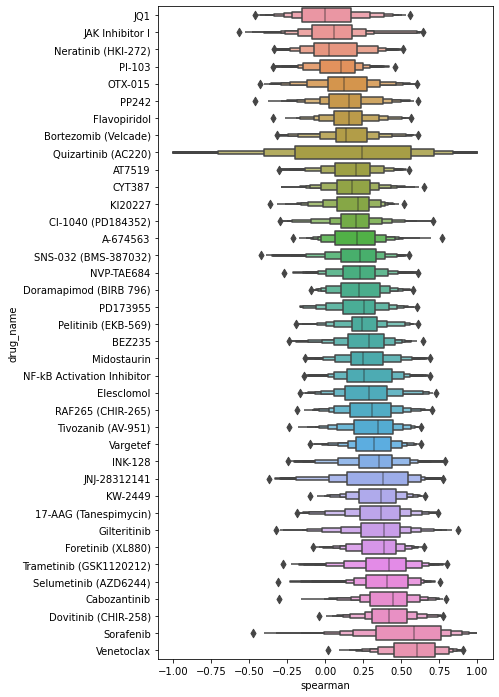

In [7]:
plot_metric_by_drug(all_data2, 'spearman', 'drug_name', 'model_performance', hue=None)

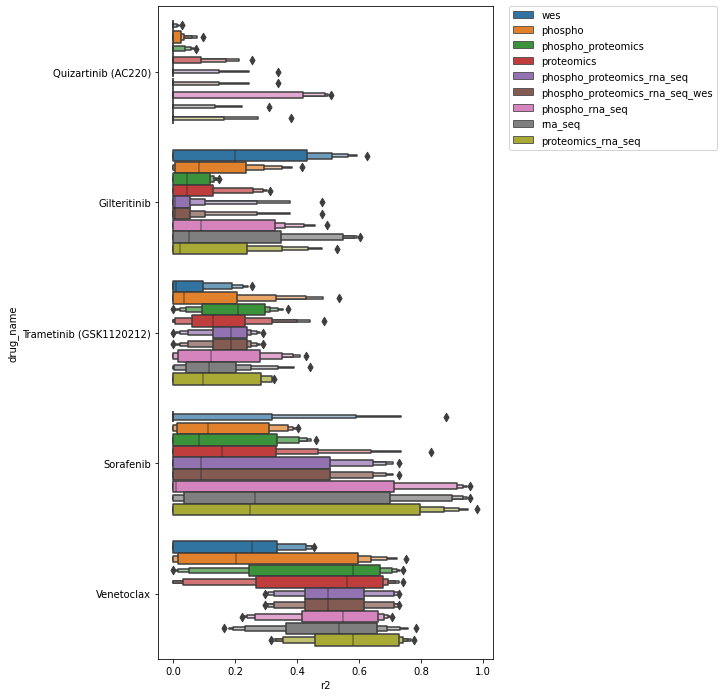

In [8]:
all_data3.loc[all_data3.r2 <0, 'r2'] =0
plot_metric_by_drug(
    all_data3,
    'r2',
    'drug_name',
    'model_performance_k10',
    hue='data_type'
)

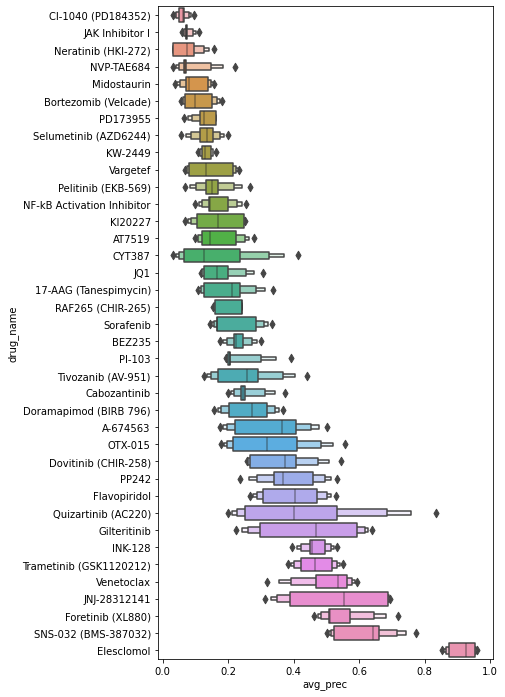

In [9]:
sample = binary_data2.loc[binary_data2.model=='gbt_binary']
sample = sample.loc[sample['data_type'] == 'wes']
plot_metric_by_drug(
    sample, 
    'avg_prec', 'drug_name', 'model_performance_binary_gbt_data_merged'
)

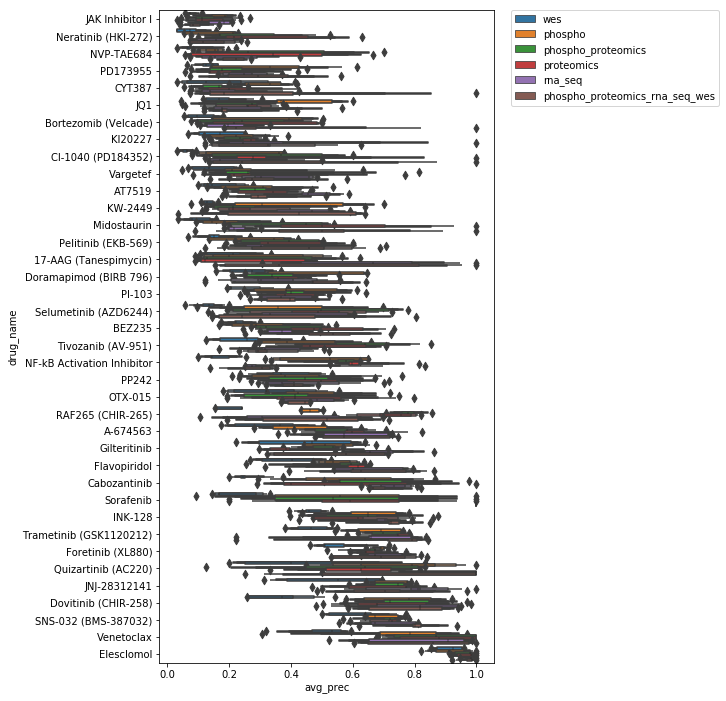

In [9]:
sample = binary_data2.loc[binary_data2.model=='gbt_binary']
# sample = sample.loc[sample['data_type'] == 'proteomics']
plot_metric_by_drug(
    sample, 
    'avg_prec', 'drug_name',
    'model_performance_binary_gbt_data_merged2_k10',
    hue='data_type'
    
)

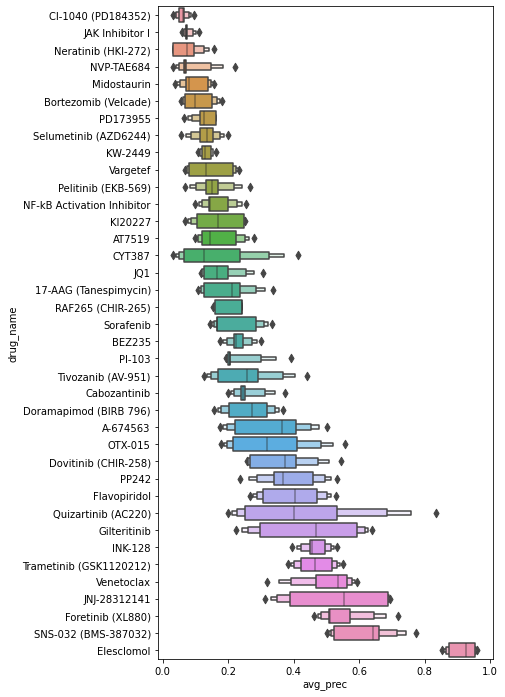

In [11]:
sample = binary_data2.loc[binary_data2.model=='gbt_binary']
sample = sample.loc[sample['data_type'] == 'wes']
plot_metric_by_drug(
    sample, 
    'avg_prec', 'drug_name', 'del_model_performance_binary_gbt_data_merged'
)

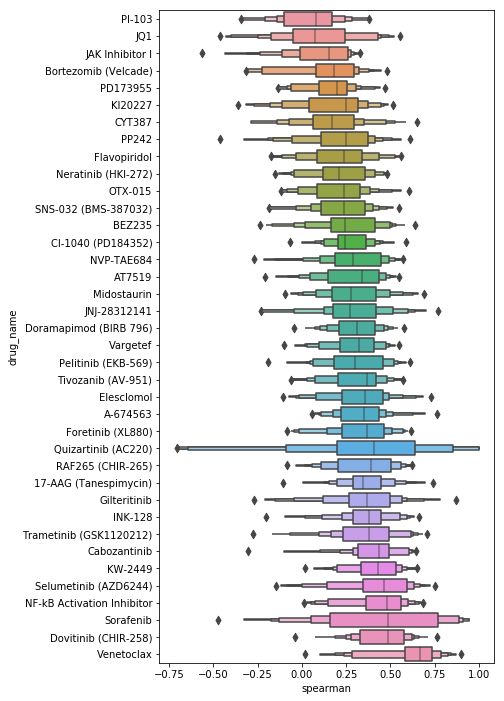

In [25]:
sample = all_data2.loc[all_data2.model=='gbt']
# sample = sample.loc[sample['data_type'] == 'proteomics']
plot_metric_by_drug(
    sample, 
    'spearman', 'drug_name', 'model_performance_spearman_gbt_all_data'
)

In [89]:
sample

,model,auc,feature_names,n_feat,rmse,r2,pearson,spearman,pr,sr,k,drug_name,data_type,avg_prec
5,SVC,1.000000,AAAS_prot|AACS_prot|AAMDC_prot|AARS2_prot|AARS...,3448,0.260579,0.700669,0.852478,0.825723,2.412892e-07,0.000001,0,Venetoclax,proteomics,1.000000
5,SVC,0.953563,AAAS_prot|AACS_prot|AAGAB_prot|AAMDC_prot|AAR2...,3437,0.312644,0.589620,0.819902,0.792393,1.684435e-06,0.000007,1,Venetoclax,proteomics,0.953563
5,SVC,0.552778,AAAS_prot|AAMDC_prot|AARS2_prot|AARSD1_prot|AB...,3413,0.355149,0.122062,0.490608,0.501493,1.745969e-02,0.014770,2,Venetoclax,proteomics,0.552778
5,SVC,0.723611,AAAS_prot|AACS_prot|AAGAB_prot|AAK1_prot|AAMDC...,3386,0.363638,0.333327,0.583926,0.579141,4.327298e-03,0.004738,3,Venetoclax,proteomics,0.723611
5,SVC,0.829030,AACS_prot|AAMDC_prot|AAR2_prot|AARS2_prot|AARS...,3253,0.453231,0.178328,0.524841,0.465702,1.214491e-02,0.028940,4,Venetoclax,proteomics,0.829030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,SVC,0.357143,A2M_prot|AACS_prot|AAMDC_prot|AAMP_prot|AARS2_...,3385,0.376607,-0.296759,0.125692,0.020468,4.930538e-01,0.911467,0,17-AAG (Tanespimycin),proteomics,0.357143
5,SVC,0.221693,A2M_prot|AACS_prot|AAMDC_prot|AARS_prot|AASDHP...,3357,0.308962,-0.092079,0.221135,0.268373,2.318911e-01,0.144355,1,17-AAG (Tanespimycin),proteomics,0.221693
5,SVC,0.123810,A2M_prot|AACS_prot|AAMDC_prot|AARS2_prot|AARS_...,3418,0.399909,-0.829648,0.010727,0.012199,9.543288e-01,0.948070,2,17-AAG (Tanespimycin),proteomics,0.123810
5,SVC,0.422222,A2M_prot|AACS_prot|AAMP_prot|AARS_prot|AASDHPP...,3448,0.351919,-0.416871,0.052354,0.060994,7.797019e-01,0.744464,3,17-AAG (Tanespimycin),proteomics,0.422222


In [74]:
sorted(sample.drug_name.unique())

['17-AAG (Tanespimycin)',
 'A-674563',
 'AT7519',
 'BEZ235',
 'Bortezomib (Velcade)',
 'CI-1040 (PD184352)',
 'CYT387',
 'Cabozantinib',
 'Doramapimod (BIRB 796)',
 'Dovitinib (CHIR-258)',
 'Elesclomol',
 'Flavopiridol',
 'Foretinib (XL880)',
 'Gilteritinib',
 'INK-128',
 'JAK Inhibitor I',
 'JNJ-28312141',
 'JQ1',
 'KI20227',
 'KW-2449',
 'Midostaurin',
 'NF-kB Activation Inhibitor',
 'NVP-TAE684',
 'Neratinib (HKI-272)',
 'OTX-015',
 'PD173955',
 'PI-103',
 'PP242',
 'Pelitinib (EKB-569)',
 'Quizartinib (AC220)',
 'RAF265 (CHIR-265)',
 'SNS-032 (BMS-387032)',
 'Selumetinib (AZD6244)',
 'Sorafenib',
 'Tivozanib (AV-951)',
 'Trametinib (GSK1120212)',
 'Vargetef',
 'Venetoclax']

No handles with labels found to put in legend.


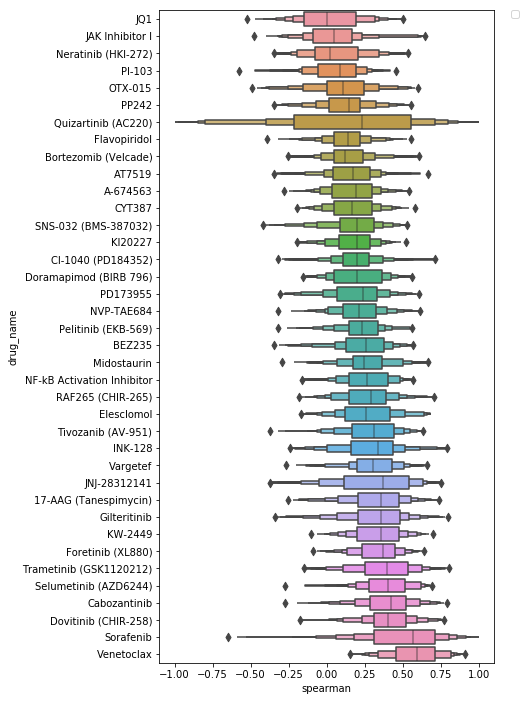

In [42]:
plot_metric_by_drug(all_data, 'spearman', 'drug_name', 'model_performance2', hue=None)

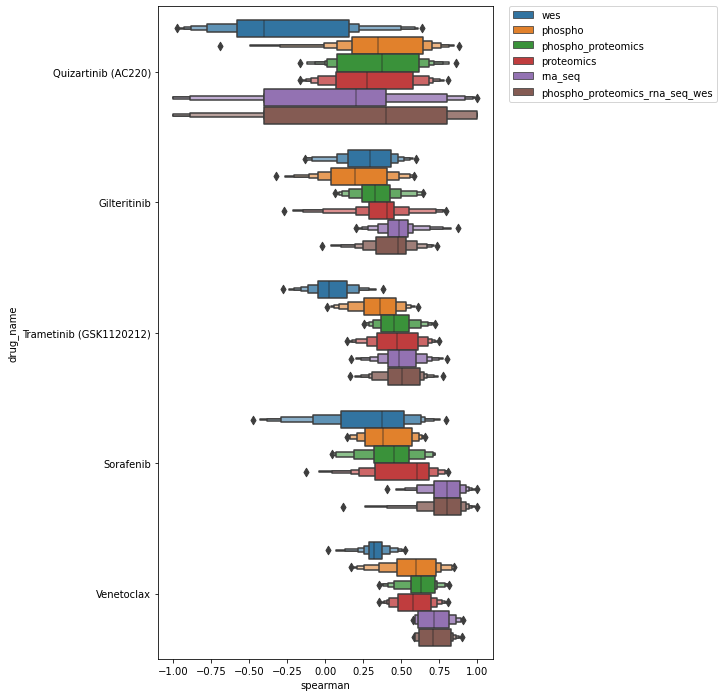

In [10]:
drugs_to_focus = [
        'Gilteritinib',
        'Venetoclax',
        'Sorafenib',
        'Quizartinib (AC220)',
        'Trametinib (GSK1120212)',
    ]
df_subset = all_data2.loc[all_data2.drug_name.isin(drugs_to_focus)]
plot_metric_by_drug(df_subset, x='spearman', y='drug_name', save_name='model_performance_drugs_subset', hue='data_type')

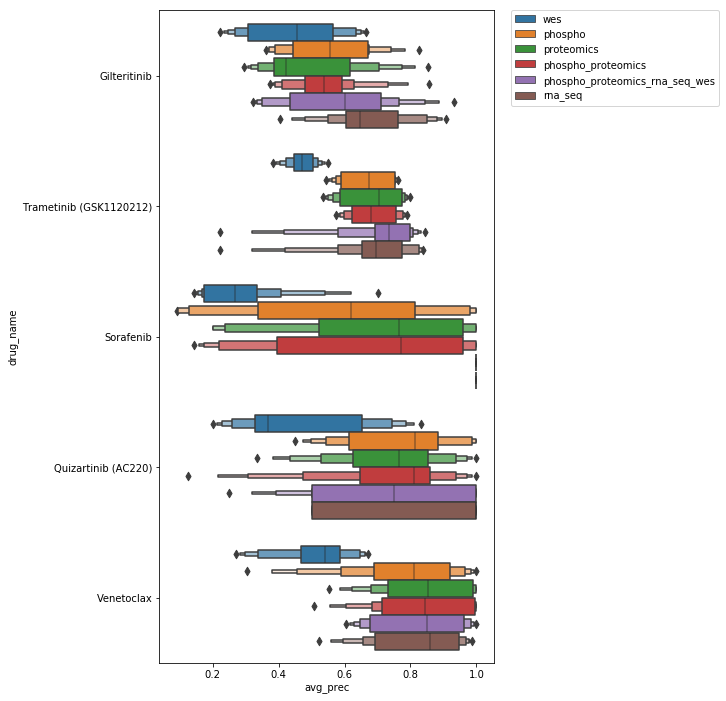

In [158]:
df_subset = binary_data2.loc[binary_data2.drug_name.isin(drugs_to_focus)]
plot_metric_by_drug(df_subset, x='avg_prec', y='drug_name',
                    save_name='model_performance_drugs_subset_binary', hue='data_type')

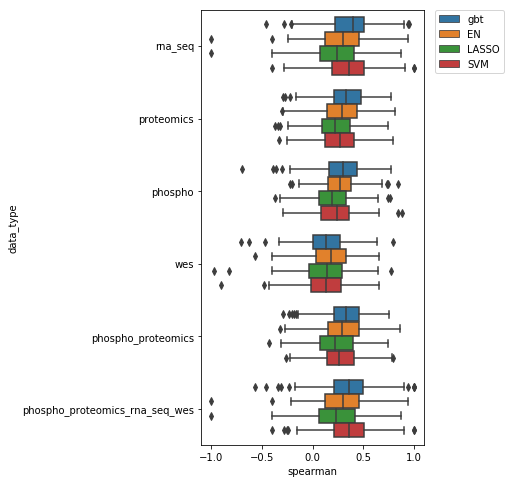

In [160]:
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot(111)
sns.boxplot(
    data=all_data2,
    x="spearman",
    y="data_type", 
    hue="model",
    ax=ax, 
#     order=sort_index[-1:]
);
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig("model_vs_dtype.png", dpi=300, bbox_inches='tight')

In [162]:
venetoclax = all_data2.loc[all_data2.drug_name == 'Venetoclax'].copy()
sort_index = venetoclax.groupby('data_type')['spearman'].mean()
sort_index.sort_values(inplace=True)
sort_index = sort_index.index.values

In [163]:
venetoclax

,model,auc,feature_names,n_feat,rmse,r2,pearson,spearman,pr,sr,k,drug_name,data_type,avg_prec
0,gbt,NaN,ACTG1_rna|ADAM22_rna|AQPEP_rna|ARHGEF10_rna|BC...,51,37.883415,0.762783,0.873777,0.896241,4.842510e-07,9.035617e-08,0,Venetoclax,rna_seq,NaN
2,EN,NaN,AC018738.2_rna|AC091814.2_rna|AC093375.1_rna|A...,150,38.488847,0.755141,0.875353,0.839098,4.350830e-07,3.769062e-06,0,Venetoclax,rna_seq,NaN
3,LASSO,NaN,AC018738.2_rna|AC091814.2_rna|AC141928.1_rna|A...,49,53.902793,0.519748,0.753352,0.747368,1.257390e-04,1.523137e-04,0,Venetoclax,rna_seq,NaN
4,SVM,NaN,A1BG-AS1_rna|A2M_rna|A3GALT2_rna|AADAT_rna|AAE...,10746,34.419745,0.804178,0.898416,0.905263,7.528492e-08,4.121874e-08,0,Venetoclax,rna_seq,NaN
0,gbt,NaN,AC017104.6_rna|ADAM22_rna|ARHGAP8_rna|ATG12_rn...,40,44.076006,0.718066,0.874748,0.806015,4.533966e-07,1.783459e-05,1,Venetoclax,rna_seq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,SVM,NaN,A1BG-AS1_rna|A1BG_rna|AADAT_rna|AAED1_rna|AAK1...,15747,60.364285,0.334600,0.632893,0.606015,2.744354e-03,4.622615e-03,3,Venetoclax,phospho_proteomics_rna_seq_wes,NaN
0,gbt,NaN,AP003733.1_rna|ARRDC1_prot|ATP6V0A1_rna|BIRC6_...,26,56.077343,0.430645,0.693516,0.680702,9.916063e-04,1.337069e-03,4,Venetoclax,phospho_proteomics_rna_seq_wes,NaN
2,EN,NaN,ADRA2C_rna|AGXT_rna|AL133493.2_rna|AL589743.1_...,132,59.690637,0.354909,0.685619,0.622807,1.194224e-03,4.395931e-03,4,Venetoclax,phospho_proteomics_rna_seq_wes,NaN
3,LASSO,NaN,ADRA2C_rna|AGXT_rna|AL589743.1_rna|AP000525.9_...,39,62.837651,0.285095,0.688576,0.629825,1.114655e-03,3.852741e-03,4,Venetoclax,phospho_proteomics_rna_seq_wes,NaN


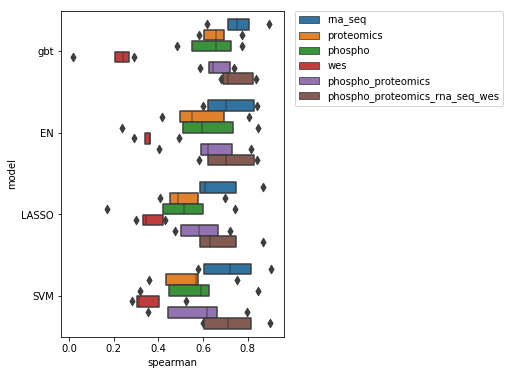

In [164]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(111)
ax = sns.boxenplot(
    data=venetoclax,
    x="spearman",
    y="model", 
    hue="data_type",
    ax=ax, 
    #hue_order=sort_index
)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig("venetoclax_pearson_by_model.png", dpi=300, bbox_inches='tight')

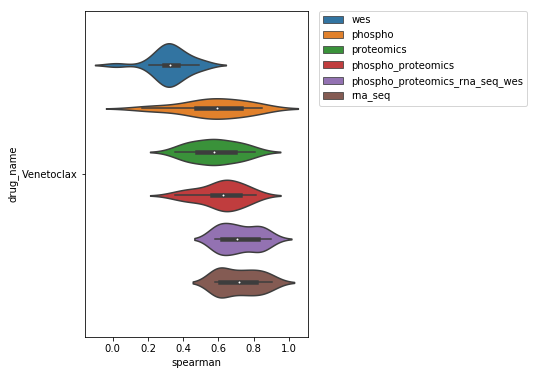

In [18]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(111)
ax = sns.violinplot(
    data=venetoclax,
    x="spearman",
    y="drug_name", 
    hue="data_type",
    ax=ax, 
    hue_order=sort_index
)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig("venetoclax_pearson_by_data.png", dpi=300, bbox_inches='tight')

In [117]:
def plot_indidvidual_drug(data, drug_name, prefix, x='spearman', y='data_type'):
    subset = data.loc[data.drug_name == drug_name].copy()
    sort_index = subset.groupby(y)[x].mean()
    sort_index = sort_index.sort_values().index.values
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    plt.title(drug_name)
    ax = sns.boxenplot(
        data=subset,
        x=x,
        y=y, 
        k_depth='full',
        hue="model",
        ax=ax, 
        order=sort_index
    )
#     ax = sns.swarmplot(
#         data=subset,
#         x=x,
#         y=y, 
#         hue="model",
#         ax=ax, 
#         order=sort_index
#     )
#     plt.xlim(0, 1.1)
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    drug_name = drug_name.split(' ')[0]
    plt.savefig(f"{prefix}_{drug_name}_pearson_by_data.png", dpi=300, bbox_inches='tight')
    
    subset = pd.pivot_table(subset, index='data_type', columns='k', values=x, aggfunc='mean')
    ax = sns.clustermap(
        data=subset,
        row_cluster=True, 
        col_cluster=False,
        annot=True,
        fmt='0.3f',
        linewidths=0.01,
        figsize=(12, 12),
        cmap='Reds'

    )
    # Put the legend out of the figure
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    plt.savefig(f"{prefix}_{drug_name}_indepth_by_data.png", dpi=300, bbox_inches='tight')

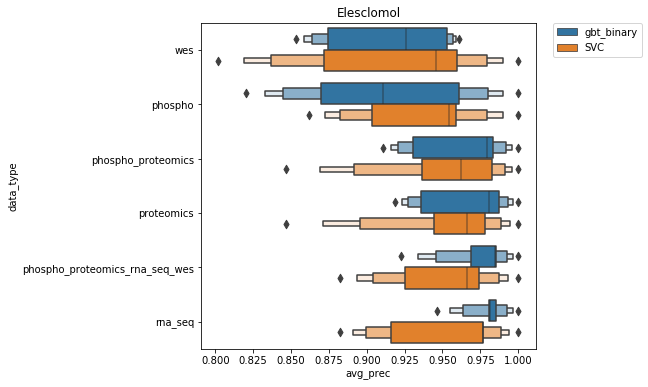

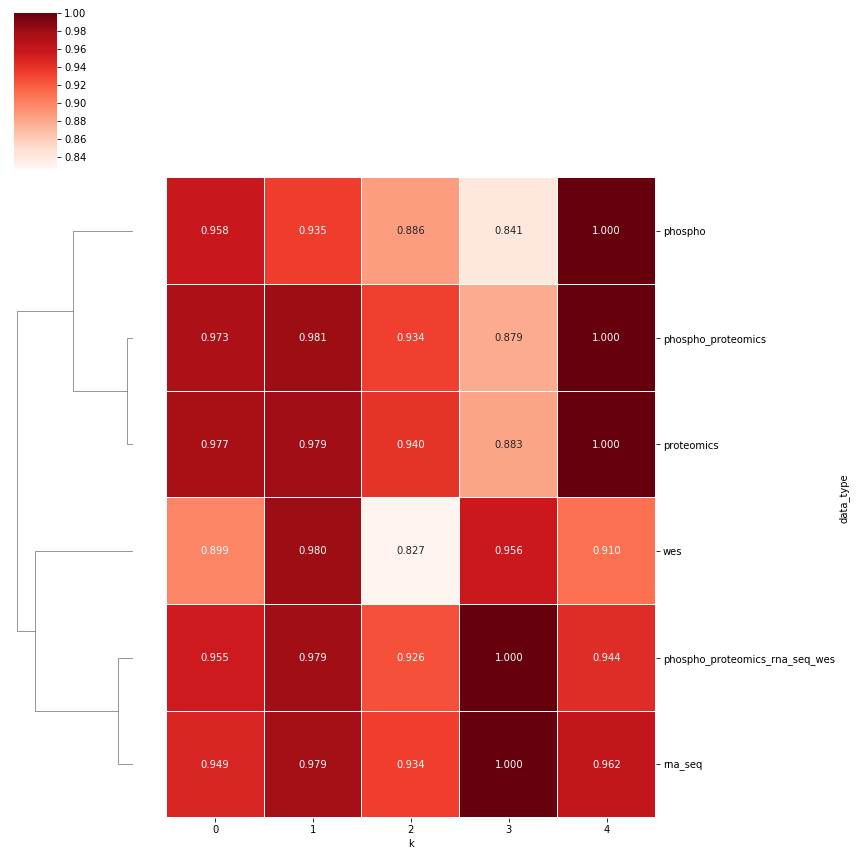

In [118]:

plot_indidvidual_drug(binary_data2, 'Elesclomol', 'd1', 'avg_prec', )

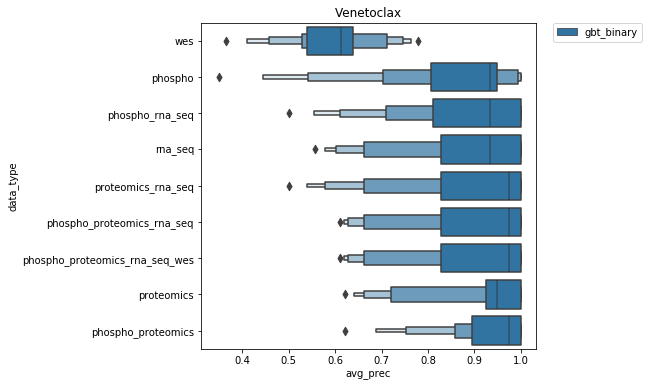

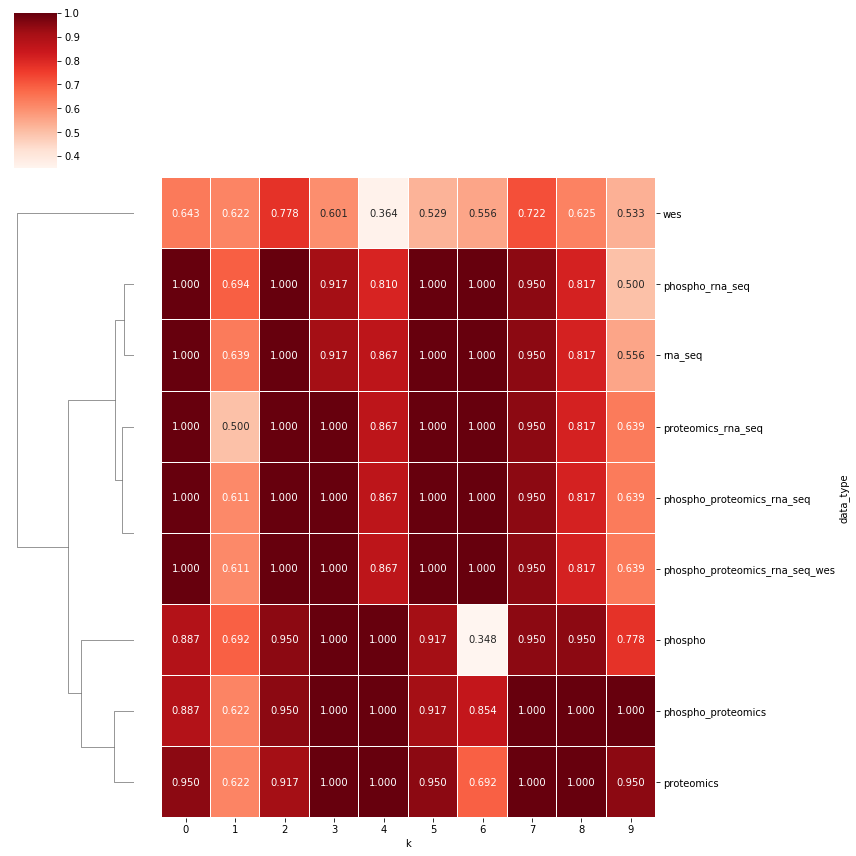

In [124]:
plot_indidvidual_drug(all_data4, 'Venetoclax', 'ven_binary', 'avg_prec')

In [125]:
ven_pivot = pd.pivot_table(venetoclax, index='data_type', columns='model', values='avg_prec', aggfunc='mean')
ven_pivot

model,gbt_binary
data_type,
phospho,0.737609
phospho_proteomics,0.912613
phospho_proteomics_rna_seq,0.918889
phospho_proteomics_rna_seq_wes,0.918889
phospho_rna_seq,0.888889
proteomics,0.892502
proteomics_rna_seq,0.935952
rna_seq,0.888194
wes,0.606498


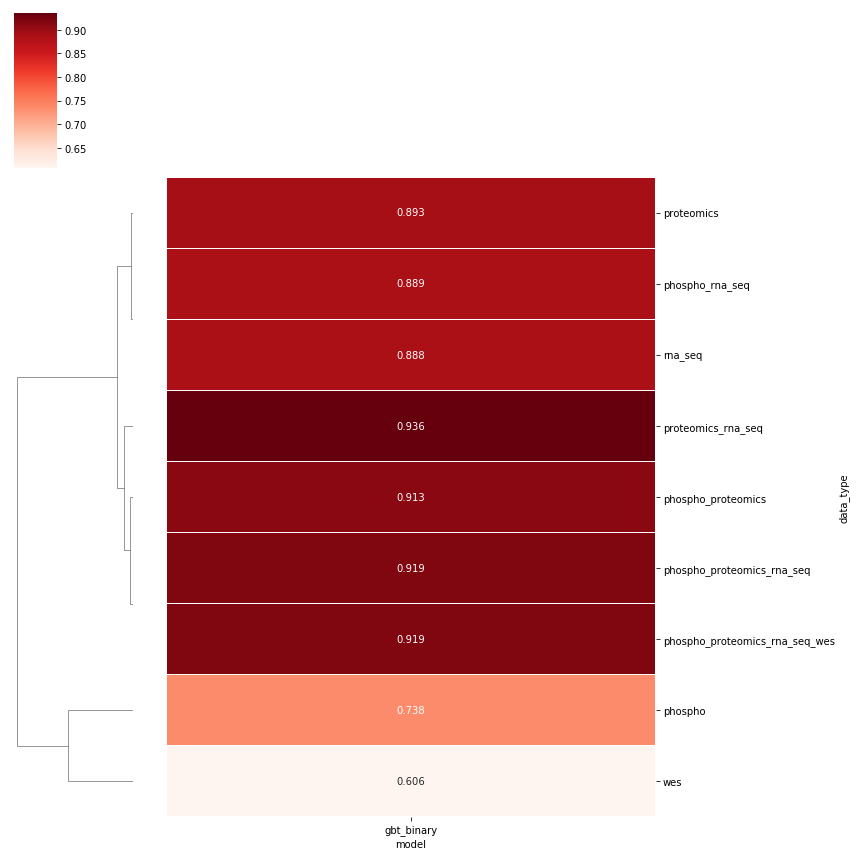

In [126]:
ax = sns.clustermap(
    data=ven_pivot,
    row_cluster=True, 
    col_cluster=False,
    annot=True,
    fmt='0.3f',
    linewidths=0.01,
    figsize=(12,12),
    cmap='Reds'

)
# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig("venetoclax_indepth_by_data.png", dpi=300, bbox_inches='tight')

In [25]:

venetoclax_gbt.head(5)

,model,auc,feature_names,n_feat,rmse,r2,pearson,spearman,pr,sr,k,drug_name,data_type,avg_prec
0,gbt,NaN,ACTG1_rna|ADAM22_rna|AQPEP_rna|ARHGEF10_rna|BC...,51,37.883415,0.762783,0.873777,0.896241,4.842510e-07,9.035617e-08,0,Venetoclax,rna_seq,NaN
0,gbt,NaN,AC017104.6_rna|ADAM22_rna|ARHGAP8_rna|ATG12_rn...,40,44.076006,0.718066,0.874748,0.806015,4.533966e-07,1.783459e-05,1,Venetoclax,rna_seq,NaN
0,gbt,NaN,AC006946.16_rna|AC018865.5_rna|AC087380.14_rna...,59,64.805235,0.484968,0.713048,0.618045,4.171435e-04,3.681419e-03,2,Venetoclax,rna_seq,NaN
0,gbt,NaN,ADAM15_rna|ADAM22_rna|ATP6V1H_rna|BTBD9_rna|CH...,38,49.666696,0.549543,0.773072,0.712782,6.425924e-05,4.201754e-04,3,Venetoclax,rna_seq,NaN
0,gbt,NaN,ABCB4_rna|AC005534.6_rna|ADAM23_rna|AREL1_rna|...,36,53.647415,0.478918,0.726669,0.752632,4.251142e-04,2.006343e-04,4,Venetoclax,rna_seq,NaN


In [27]:
from collections import Counter
from functools import reduce

def get_feature_counts(features):
    c = Counter()
    for k in features:
        current_features = Counter(k.split('|'))
        c += current_features
    return c

def get_feature_matrix(df):
    c=0
    all_counts = []
    for i, d in df.groupby(['data_type', 'drug_name']):
#         print(i, d)
        counts = pd.Series(get_feature_counts(d.feature_names))
        counts = counts.to_frame(name='_'.join(i))
        all_counts.append(counts)
    #     counts.reset_index(inplace=True)
    #     counts.rename({'index': 'feature'}, axis=1, inplace=True)
    #     counts['feature'] = counts['index']
    #     del counts['index']
    #     print(counts)


        
    #     if c ==2:
    #         break
    #     c+=1
    all_counts = pd.concat(all_counts, axis=1)
    all_counts.fillna(0, inplace=True)
    # all_counts = reduce(lambda x, y: pd.merge(x, y, on = 'feature', ), all_counts)
    all_counts.head()
#     all_counts.sort_values(by='phospho_proteomics_rna_seq_wes_gbt')
    return all_counts

In [147]:
venetoclax = all_data4.loc[all_data4.drug_name == 'Venetoclax'].copy()
venetoclax_gbt = venetoclax.loc[venetoclax.model=='gbt_binary'].copy()
all_counts = get_feature_matrix(venetoclax_gbt)
all_counts.sort_values(by='proteomics_Venetoclax')['proteomics_Venetoclax']

AHNAK-S570s          0.0
RP11-153M7.3_rna     0.0
RGS9BP_rna           0.0
RCC2P6_rna           0.0
PTGIR_rna            0.0
                    ... 
COL4A3BP_prot        9.0
NCOA4_prot           9.0
CLCN3_prot           9.0
GIMAP8_prot         10.0
KCTD12_prot         10.0
Name: proteomics_Venetoclax, Length: 1847, dtype: float64

In [137]:
feature_output = dict()
feature_output_raw = dict()

for i in all_counts.columns:
    if i == 'wes_Venetoclax':
        continue
    tmp = all_counts[i].copy()
    tmp = tmp[tmp>1]
#     print(i, sorted(tmp.sort_values(ascending=False).index.values))
    genes = sorted(tmp.sort_values(ascending=False).index.values)
    feature_output_raw[i] = genes
    clean_genes = []
    for n in genes:
        if '_prot' in n or '_rna' in n or '_mut' in n:
            clean_genes.append(n.split('_')[0])
        else:
            clean_genes.append(n.split('-')[0])
    feature_output[i] = sorted(set(clean_genes))
for i in feature_output:
    print(i, len(feature_output[i]),)# feature_output[i], '\n')

phospho_Venetoclax 135
phospho_proteomics_Venetoclax 116
phospho_proteomics_rna_seq_Venetoclax 112
phospho_proteomics_rna_seq_wes_Venetoclax 112
phospho_rna_seq_Venetoclax 124
proteomics_Venetoclax 136
proteomics_rna_seq_Venetoclax 110
rna_seq_Venetoclax 120


In [138]:
from magine.enrichment.enrichr import Enrichr
e = Enrichr()

In [139]:
enrichment_results_vent = e.run_samples(
    list(feature_output.values()),
    list(feature_output.keys()), 
    gene_set_lib='Reactome_2016'
)

48277608
48277609
48277610
48277611
48277612
48277613
48277614
48277615


In [140]:
enrichment_results_vent.sig.head(20)

,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,significant,sample_id
1444,immunoregulatory interactions between a lympho...,1,0.000006,9.130757,109.567821,0.001844,"CD300E,HLA-F,LILRA6,LILRB1,LILRB2,LILRB3,SIGLE...",8,Reactome_2016,True,phospho_rna_seq_Venetoclax
2150,immune system_hsa-168256,1,0.000094,2.839501,26.334671,0.019772,"BCL2,C2,CD14,CD300E,CSF1R,CTSS,CUL3,CXADR,DAPP...",21,Reactome_2016,True,proteomics_rna_seq_Venetoclax
2151,inflammasomes_hsa-622312,2,0.000104,39.805073,365.032969,0.019772,"BCL2,MEFV,TXNIP",3,Reactome_2016,True,proteomics_rna_seq_Venetoclax
2152,immunoregulatory interactions between a lympho...,3,0.000233,7.541645,63.096800,0.029455,"CD300E,CXADR,LILRA2,LILRB1,LILRB2,SIGLEC7",6,Reactome_2016,True,proteomics_rna_seq_Venetoclax


Number of rows went from 3 to 2


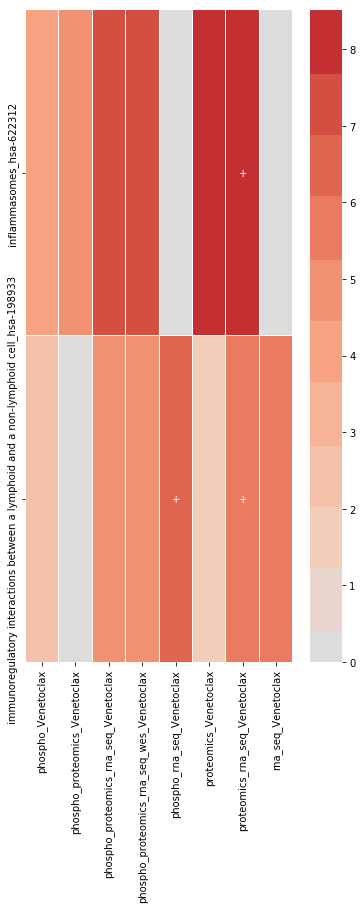

In [141]:
enrichment_results_vent.remove_redundant().heatmap(
    linewidths=0.01,
    figsize=(6, 12)
);

In [99]:
all_counts2 = all_counts[all_counts[all_counts>2].sum(axis=1) > 10]
len(all_counts2)
top_35_features = all_counts2.sum(axis=1).sort_values(ascending=False).index.values

In [100]:
all_counts.T[top_35_features].sum()

AATF_prot      5
PSMD7_prot     5
PTP4A1_prot    5
PTK7_prot      5
PTER_prot      5
              ..
GSPT1_prot     5
GSN_prot       5
GSE1_prot      5
GRK3_prot      5
ZZZ3_prot      5
Length: 1729, dtype: int64

In [101]:
all_counts[all_counts>3]
all_counts2 = all_counts[all_counts[all_counts>4].sum(axis=1) > 1]
all_counts2.sum(axis=1).sort_values(ascending=False).head(10)
top_20_features = all_counts2.sum(axis=1).sort_values(ascending=False).head(20)
top_20_features

AATF_prot      5
PSMD7_prot     5
PTP4A1_prot    5
PTK7_prot      5
PTER_prot      5
PTDSS2_prot    5
PTDSS1_prot    5
PTBP2_prot     5
PTBP1_prot     5
PSMG3_prot     5
PSMG2_prot     5
PSMG1_prot     5
PSMF1_prot     5
PSMD2_prot     5
MRPL41_prot    5
PSMD14_prot    5
PSMD12_prot    5
PSMB8_prot     5
PSMB7_prot     5
PSMB5_prot     5
dtype: int64

In [102]:
all_counts.T['BCL2_prot'].sort_values()

proteomics_SVC_Elesclomol    1
Name: BCL2_prot, dtype: int64

In [65]:
all_counts.columns

Index(['phospho_EN_17-AAG (Tanespimycin)', 'phospho_EN_A-674563',
       'phospho_EN_AT7519', 'phospho_EN_BEZ235',
       'phospho_EN_Bortezomib (Velcade)', 'phospho_EN_CI-1040 (PD184352)',
       'phospho_EN_CYT387', 'phospho_EN_Cabozantinib',
       'phospho_EN_Doramapimod (BIRB 796)', 'phospho_EN_Dovitinib (CHIR-258)',
       ...
       'wes_gbt_Pelitinib (EKB-569)', 'wes_gbt_Quizartinib (AC220)',
       'wes_gbt_RAF265 (CHIR-265)', 'wes_gbt_SNS-032 (BMS-387032)',
       'wes_gbt_Selumetinib (AZD6244)', 'wes_gbt_Sorafenib',
       'wes_gbt_Tivozanib (AV-951)', 'wes_gbt_Trametinib (GSK1120212)',
       'wes_gbt_Vargetef', 'wes_gbt_Venetoclax'],
      dtype='object', length=912)

## Plot GBT features for venetoclax

In [142]:
gbt = [i for i in all_counts.columns if ('gbt' in i)]
gbt = [i for i in gbt if ('Venetoclax' in i)]
gbt = all_counts[gbt].copy()
print(gbt.shape)
# gbt = gbt[gbt[gbt>4].sum(axis=1) > 1]
gbt.sum(axis=1).sort_values(ascending=False).head(50)

(1847, 0)


AHNAK-S570s           0.0
TCF7L2_rna            0.0
RPS23_rna             0.0
RP11-293M10.6_rna     0.0
RP11-250B2.6_rna      0.0
RHOQP3_rna            0.0
REXO4_rna             0.0
QTRT1_rna             0.0
PICALM_rna            0.0
PGBD4_rna             0.0
PEX11B_rna            0.0
NOTCH2_rna            0.0
MAP4_rna              0.0
LTA4H_rna             0.0
KIRREL2_rna           0.0
KCNQ5_rna             0.0
FCGR1B_rna            0.0
EEF1DP1_rna           0.0
DOCK6_rna             0.0
DESI2_rna             0.0
DALRD3_rna            0.0
CXCL12_rna            0.0
CTD-3088G3.4_rna      0.0
CTD-2540B15.11_rna    0.0
CPAMD8_rna            0.0
CORO1C_rna            0.0
CHKA_rna              0.0
SH2B2_rna             0.0
USP13_rna             0.0
C16orf46_rna          0.0
ACACB_rna             0.0
RP11-439A17.7_rna     0.0
RP11-384P7.6_rna      0.0
RP11-363E6.3_rna      0.0
RANBP9_rna            0.0
PSMD5_rna             0.0
PSAP_rna              0.0
PPP4R1L_rna           0.0
POLN_rna    

In [92]:
print(gbt.shape)
top_10_features = gbt.sum(axis=1).sort_values(ascending=False).head(10).index.values

(26102, 6)


In [ ]:
sns.clustermap(gbt, col_cluster=True, row_cluster=True, method='complete',
               cmap=sns.color_palette("Reds"),
               figsize=(8,30),
              linewidth=.0,
              yticklabels=False);

In [144]:
subset = all_counts[all_counts.sum(axis=1) > 5]
subset.shape

(239, 9)

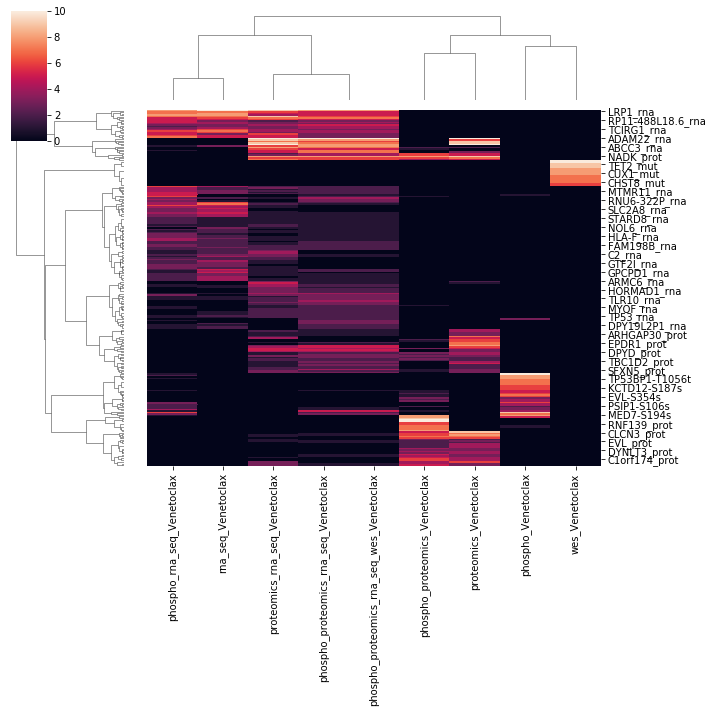

In [145]:
sns.clustermap(subset, col_cluster=True, row_cluster=True, method='ward');
plt.savefig("features_all.png", dpi=300, bbox_inches='tight')